In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests as rq

In [19]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [20]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
res=rq.get(url)
with open('drug200.csv','wb') as f:
    f.write(res.content)

/lib/python3.11/site-packages/urllib3/connectionpool.py:1101: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [27]:
df=pd.read_csv('drug200.csv')
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [30]:
x=df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

In [32]:
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [33]:
le=LabelEncoder()
le.fit(['F','M'])
x[:,1]=le.transform(x[:,1])
le.fit(['HIGH','LOW','NORMAL'])
x[:,2]=le.transform(x[:,2])
le.fit(['HIGH','NORMAL'])
x[:,3]=le.transform(x[:,3])

In [36]:
y=df['Drug']
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
drugtree=DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [56]:
drugtree.fit(x_train,y_train)
yhat=drugtree.predict(x_test)

In [57]:
print(y_test[0:5].values)
print(yhat[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
['drugY' 'drugX' 'drugX' 'drugX' 'drugX']


In [58]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,yhat))

1.0


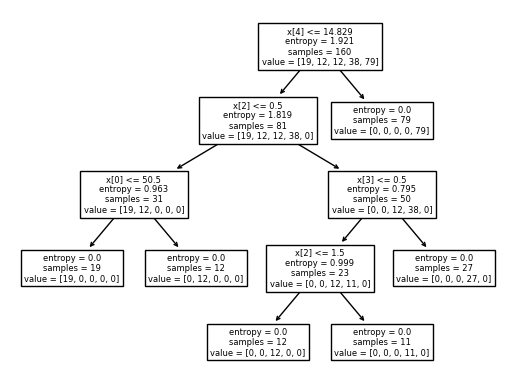

In [59]:
from sklearn import tree
tree.plot_tree(drugtree)
plt.show()